## Московский Авиационный Институт

# Лабораторная работа по предмету Численные методы №3
### "Методы приближения функций. Численное дифференцирование и интегрирование"
**Преподаватель**: Филиппов Глеб Сергеевич \
**Судент**: Титеев Рамиль \
**Группа**: М8О-305Б-21\
Вариант 26


Импортируем библиотеки, для дальнейшей работы с ними

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Задание 3.1

Используя таблицу значений $Y_i$ функции $y=f(x)$, вычисленных в точках  $X_i, \; i= 0,\dots,3$  построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки $\lbrace{ X_i, Y_i \rbrace}$.  Вычислить значение погрешности интерполяции в точке $X^{*}$.

Задано функция:
$$y = \frac{1}{x^2} + x^2$$

Заданы точки:\
А) $X_i$ = $0.1, 0.5, 0.9, 1.3$;\
Б) $X_i$ = $0.1, 0.5, 1.1, 1.3$;\
$X^{*}$ = $0.8$.

1. Реализуем метод для Интерполяции Лагранжа:

In [56]:
def lagrange_polynomial(x: list[float], y: list[float]):
    """
    Интерполяционный многочлен Лагранжа

    Args:
        x (list[float]): список значений X
        y (list[float]): список значений функции в точках X

    Returns:
        (x_value: float) -> float: lambda-функция полинома
    """
    n = len(x)
    coeffs = [0.0] * n

    for i in range(n):
        product = 1
        for j in range(n):
            if i != j:
                product *= (x[i] - x[j])
        coeffs[i] = y[i] / product

    def polynomial(x_value: float):
        result = 0.0
        for i in range(n):
            term = coeffs[i]
            for j in range(n):
                if i != j:
                    term *= (x_value - x[j])
            result += term
        return result

    return polynomial

2. Реализуем метод для Интерполяции Ньютона:

In [57]:
def newton_polynomial(x: list[float], y: list[float]):
    """
    Интерполяционный многочлен Ньютона

    Args:
        x (list[float]): список значений X
        y (list[float]): список значений функции в точках X

    Returns:
        (x_value: float) -> float: lambda-функция полинома
    """
    
    n = len(x)
    coeffs = y.copy()

    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            coeffs[j] = (coeffs[j] - coeffs[j-1]) / (x[j] - x[j-i])

    def polynomial(x_value: float):
        result = coeffs[n-1]
        for i in range(n-2, -1, -1):
            result = result * (x_value - x[i]) + coeffs[i]
        return result

    return polynomial

3. Напишем функцию, заданную вариантом

In [58]:
def f(x):
    return 1/(x**2) + x**2

4. Сделаем расчеты для варианта

In [59]:
x_val = 0.8
print(f"Значение функции в точке {x_val}: {f(x_val)}\n")

# Вариант А
X_a = np.array([0.1, 0.5, 0.9, 1.3])

lagrange_poly_a = lagrange_polynomial(X_a, f(X_a))
newton_poly_a = newton_polynomial(X_a, f(X_a))
lagrange_result_a = lagrange_poly_a(x_val)
newton_result_a = newton_poly_a(x_val)

print("Вариант А")
print(f"Значение многочлена Лагранжа в точке {x_val}: {lagrange_result_a}")
print(f"Значение многочлена Ньютона в точке {x_val}: {newton_result_a}\n")


# Вариант Б
X_b = np.array([0.1, 0.5, 1.1, 1.3])

lagrange_poly_b = lagrange_polynomial(X_b, f(X_b))
newton_poly_b = newton_polynomial(X_b, f(X_b))
lagrange_result_b = lagrange_poly_b(x_val)
newton_result_b = newton_poly_b(x_val)

print("Вариант Б")
print(f"Значение многочлена Лагранжа в точке {x_val}: {lagrange_result_b}")
print(f"Значение многочлена Ньютона в точке {x_val}: {newton_result_b}")

Значение функции в точке 0.8: 2.2024999999999997

Вариант А
Значение многочлена Лагранжа в точке 0.8: -1.1921279859741385
Значение многочлена Ньютона в точке 0.8: -1.1921279859741247

Вариант Б
Значение многочлена Лагранжа в точке 0.8: -6.018516308865962
Значение многочлена Ньютона в точке 0.8: -6.018516308865969


5. Построим графики

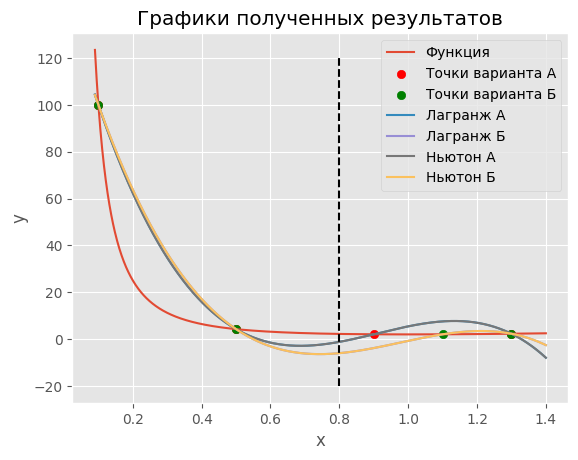

In [60]:
t = np.linspace(X_a[0]-0.01, X_a[-1]+0.1, 1000)

plt.title("Графики полученных результатов")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t, f(t), label="Функция")

plt.scatter(X_a, f(X_a), c="r", label="Точки варианта A")
plt.scatter(X_b, f(X_b), c="g", label="Точки варианта Б")

plt.plot(t, lagrange_poly_a(t), label="Лагранж А")
plt.plot(t, lagrange_poly_b(t), label="Лагранж Б")

plt.plot(t, newton_poly_a(t), label="Ньютон А")
plt.plot(t, newton_poly_b(t), label="Ньютон Б")
plt.legend()

plt.vlines(0.8, -20, 120, linestyles='--', colors='black')
plt.show()

Расчитаем погрешности:

In [61]:
print("Вариант А")
print(f"Значение погрешности Лагранжа в точке {x_val}: \
{np.abs(lagrange_result_a-f(x_val))}")
print(f"Значение многочлена Ньютона в точке {x_val}: \
{np.abs(newton_result_a-f(x_val))}")
print()
print("Вариант Б")
print(f"Значение погрешности Лагранжа в точке {x_val}: \
{np.abs(lagrange_result_b-f(x_val))}")
print(f"Значение многочлена Ньютона в точке {x_val}: \
{np.abs(newton_result_b-f(x_val))}")


Вариант А
Значение погрешности Лагранжа в точке 0.8: 3.394627985974138
Значение многочлена Ньютона в точке 0.8: 3.3946279859741244

Вариант Б
Значение погрешности Лагранжа в точке 0.8: 8.221016308865963
Значение многочлена Ньютона в точке 0.8: 8.22101630886597


### Вывод 3.1
Были построены интерполяционные полиномы по точкам $X_i, Y_i$ и вычислены погрешности в точке $X^{*}$. Построены графики интерполяции.

## Задание 3.2

Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при $x=x_0$ и $x = x_4$. Вычислить значение функции в точке $x = X^{*}$.

Заданы данные:

$X^{*} = 0.8$

| i | 0 | 1 | 2 | 3 | 4 |
|---|---|---|---|---|---|
| $x_i$ | 0.1  |  0.5 |  0.9 | 1.3  |  1.7 |
| $f_i$ | 100.01  | 4.25 | 2.0446 | 2.2817  |  3.2360  |

1. Реализуем класс Кубиского сплайна

In [62]:
class Cubic_Spline:
    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.n = len(x) - 1
        self.h = np.diff(x)
        self.a = y[:-1]
        self.b = np.zeros(self.n)
        self.c = np.zeros(self.n)
        self.d = np.zeros(self.n)
        self.compute_coefficients()

    def compute_coefficients(self):
        # Создание системы линейных уравнений для нахождения коэффициентов c
        A = np.zeros((self.n + 1, self.n + 1))
        b = np.zeros(self.n + 1)

        A[0, 0] = 1
        A[self.n, self.n] = 1

        for i in range(1, self.n):
            A[i, i-1] = self.h[i-1]
            A[i, i] = 2 * (self.h[i-1] + self.h[i])
            A[i, i+1] = self.h[i]
            b[i] = 3 * ((self.y[i+1] - self.y[i]) / self.h[i] - 
                        (self.y[i] - self.y[i-1]) / self.h[i-1])

        # Решение системы линейных уравнений
        self.c = np.linalg.solve(A, b)

        # Вычисление коэффициентов b и d
        for i in range(self.n):
            self.b[i] = ((self.y[i+1] - self.y[i]) / 
                         self.h[i]) - self.h[i] * (2*self.c[i] + self.c[i+1]) / 3
            self.d[i] = (self.c[i+1] - self.c[i]) / (3 * self.h[i])

    def __call__(self, z):
        # Находим подходящий интервал для z
        if z < self.x[0] or z > self.x[-1]:
            raise ValueError("Значение вне диапазона интерполяции")
        i = np.searchsorted(self.x, z) - 1
        if i == self.n:
            i -= 1
        dx = z - self.x[i]
        # Вычисляем значение сплайна в точке z
        return self.a[i] + self.b[i]*dx + self.c[i]*dx**2 + self.d[i]*dx**3



In [63]:
x = np.array([0.1, 0.5, 0.9, 1.3, 1.7])
y = np.array([100.01, 4.25, 2.0446, 2.2817, 3.2360])


spline = Cubic_Spline(x, y)

x_interp = 0.8  # Точка интерполяции
y_interp = spline(x_interp)  # Интерполированное значение
print(f"Интерполированное значение в точке {x_interp}: {y_interp}")

Интерполированное значение в точке 0.8: -1.2589165736607058


2. Построим графики

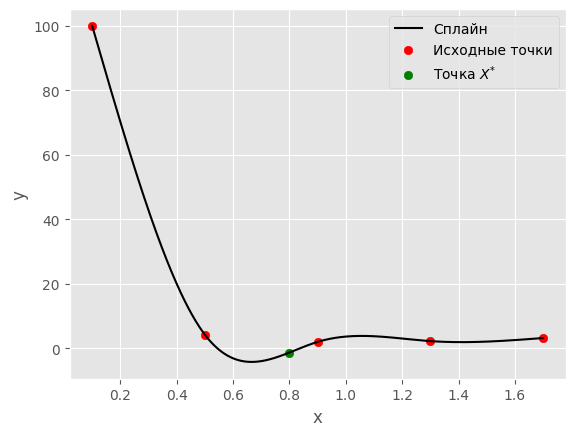

In [64]:
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
t = np.linspace(x[0]+1e-10, x[-1] - 1e-10, 1000)
forDraw = []
for t_val in t:
    forDraw.append(spline(t_val))
plt.plot(t, forDraw, label="Сплайн", color='black')
plt.scatter(x, y, c="r", label="Исходные точки")
plt.scatter([x_interp], spline(x_interp), c="g", label="Точка $X^{*}$")

plt.legend()
plt.show()

### Вывод 3.2
Был построен кубический сплайн по заданным точкам и вычисленно значение сплайна в точке $X^{*}$.

## Задание 3.3
Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

Заданы точки:
| i | 0 | 1 | 2 | 3 | 4 | 5 |
|---|---|---|---|---|---|---|
| $x_i$ | 0.1 | 0.5 | 0.9 |  1.3 | 1.7  |  2.1 |
| $y_i$ | 100.1 | 4.25 | 2.0446 | 2.2817 | 3.236 | 4.6368 |


1. Реализуем метод наименьших квадратов

In [65]:
def OLS(x: np.ndarray, 
        target: np.ndarray, 
        m: int
) -> tuple[np.ndarray[float], int]:
    """## Метод Наименьших Квадратов

    ### Args:
        x (np.ndarray): Вектор X
        target (np.ndarray): Вектор целевой переменной
        m (int): Степень многочлена

    ### Returns:
        tuple[np.ndarray[float], int]: Вектор коэффициентов и 
        Сумма квадратов ошибки 
    """

    X = np.vander(x, m+1, increasing=True)
    coef = np.linalg.inv(X.T @ X) @ (X.T @ target)
    SE = sum((X@coef - target)**2)

    return coef, SE

2. Реализуем оценку функции по найденным коэффициентам

In [66]:
def estimate_f(x, w):
    return np.sum([x**i * w[i] for i in range(len(w))], axis=0)

3. Сделаем расчеты для варианта

In [67]:
x = np.array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1])
y = np.array([100.1, 4.25, 2.0446, 2.2817, 3.236, 4.6368])

In [68]:
coef1, SE_1 = OLS(x, y, 1)
coef2, SE_2 = OLS(x, y, 2)


In [69]:
print(f"Квадратичная ошибка для многочлена степени m = 1: {SE_1}")
print(f"Квадратичная ошибка для многочлена степени m = 2: {SE_2}")


Квадратичная ошибка для многочлена степени m = 1: 4522.395031772
Квадратичная ошибка для многочлена степени m = 2: 1559.3709140120006


3. Построим графики

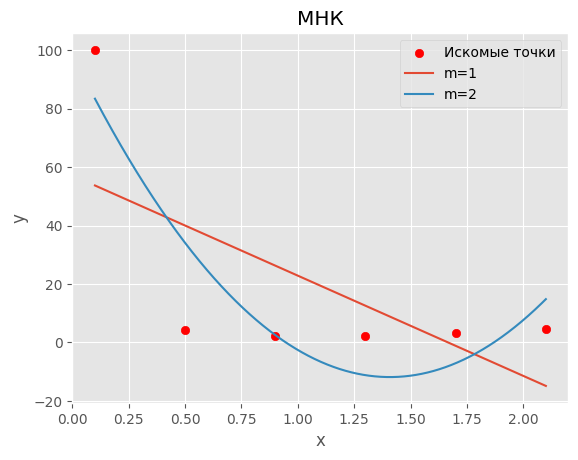

In [70]:
plt.title("МНК")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
t = np.linspace(x[0], x[-1], 1000)
plt.scatter(x, y, c="r", label="Искомые точки")
plt.plot(t, estimate_f(t, coef1), label="m=1")
plt.plot(t, estimate_f(t, coef2), label="m=2")

plt.legend()
plt.show()

### Вывод 3.3
Был реализован Метод Наименьших Квадратов и построены приближения первого и второго порядков для функции, заданной точками. Рассчитаны квадратичные ошибки, на основе которых можно положить, что многочлен второй степени лучше аппроксимирует заданный набор точек.

## Задание 3.4
Вычислить первую и вторую производную от таблично заданной функции в точке.

Заданы точки:

| i | 0 | 1 | 2 | 3 | 4 |
|---|---|---|---|---|---|
| $x_i$ | 0.0 | 1.0 | 2.0 | 3.0 | 4.0 | 
| $y_i$ | 0.0 | 0.86603 | 1.0 | 0.0 | -2.0  |

$X^{*} = 2.0$

1. Реализуем расчет первой и второй производной

In [71]:
def first_derivative(y_values, x_values, point_index):
    h_forward = x_values[point_index + 1] - x_values[point_index]
    h_backward = x_values[point_index] - x_values[point_index - 1]
    return ((y_values[point_index + 1] - y_values[point_index - 1]) /
            (h_forward + h_backward))

def second_derivative(y_values, x_values, point_index):
    h_forward = x_values[point_index + 1] - x_values[point_index]
    h_backward = x_values[point_index] - x_values[point_index - 1]
    return (y_values[point_index + 1] - 2 * y_values[point_index] +
             y_values[point_index - 1]) / (h_forward * h_backward)


2. Проведем расчеты для варианта

In [72]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([0.0, 0.86603, 1.0, 0.0, -2.0])
i_s = 2

In [73]:
df_s = first_derivative(y, x, i_s)
ddf_s = second_derivative(y, x, i_s)

print(f"Значение первой производной в точке X_s: {df_s} и второй: {ddf_s}")

Значение первой производной в точке X_s: -0.433015 и второй: -1.1339700000000001


### Вывод 3.4

Были произведены расчеты первой и второй производной в точке как конечные разности.

## Задание 3.5
Вычислить определенный интеграл  $F = \int\limits_{X_0}^{X_1} y \ dx$, методами прямоугольников, трапеций, Симпсона с шагами $h_1, h_2$. Оценить погрешность вычислений, используя  Метод Рунге-Ромберга.

Задана функция: 
$$y = x^2\sqrt{36-x^2}$$ 

Края: $X_0=1$, $X_k=5$, $h_1=1.0$, $h_2 =0.5$

1. Реализуем метод прямоугольников

In [74]:
def rectangle_rule(f, a: float, b: float, h: float):
    """
    Метод прямоугольников

    Args:
        f ((float)-> float): Исходная функция
        a (float): Левая граница
        b (float): Правая граница
        h (float): Шаг

    Returns:
        float: Посчитаный интеграл
    """
    n = int((b - a) / h)
    integral = sum(f(a + i * h) for i in range(n))
    return h * integral

2. Реализуем метод трапеций

In [75]:
def trapezoidal_rule(f, a, b, h):
    """
    Метод трапеций

    Args:
        f ((float)-> float): Исходная функция
        a (float): Левая граница
        b (float): Правая граница
        h (float): Шаг

    Returns:
        float: Посчитаный интеграл
    """
    n = int((b - a) / h)
    integral = 0.5 * (f(a) + f(b)) + sum(f(a + i * h) for i in range(1, n))
    return h * integral

3. Реализуем метод Симпсона

In [76]:
def simpsons_rule(f, a, b, h):
    """
    Метод Симпсона

    Args:
        f ((float)-> float): Исходная функция
        a (float): Левая граница
        b (float): Правая граница
        h (float): Шаг

    Returns:
        float: Посчитаный интеграл
    """
    n = int((b - a) / h)
    h = (b - a) / n
    integral = (f(a) + f(b) + 4 * sum(f(a + i * h) for i in range(1, n, 2)) + 
                2 * sum(f(a + i * h) for i in range(2, n, 2)))
    return h * integral / 3

4. Реализуем метод Рунге-Ромберга для оценки погрешности

In [77]:
def runge_romberg(h1, I_h1, h2, I_h2, p):
    return I_h2 + (I_h2 - I_h1) / ((h2 / h1) ** p - 1)

5. Напишем функцию заданную вариантом

In [78]:
def f(x):
    return (x**2)*np.sqrt(36-x**2)

6. Сделаем расчеты для варианта

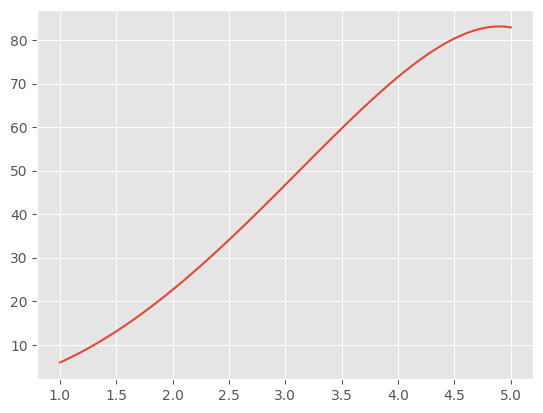

In [79]:
x_0, x_1 = 1, 5
h1, h2 = 1, 0.5

t = np.linspace(x_0, x_1, 100)
plt.plot(t, f(t))
plt.grid(True)
plt.show()

In [80]:
I_rectangle_h1 = rectangle_rule(f, x_0, x_1, h1)
I_trapezoidal_h1 = trapezoidal_rule(f, x_0, x_1, h1)
I_simpsons_h1 = simpsons_rule(f, x_0, x_1, h1)

I_rectangle_h2 = rectangle_rule(f, x_0, x_1, h2)
I_trapezoidal_h2 = trapezoidal_rule(f, x_0, x_1, h2)
I_simpsons_h2 = simpsons_rule(f, x_0, x_1, h2)

In [81]:
p = 2  # Порядок метода
S_rectangle = runge_romberg(h1, I_rectangle_h1, h2, I_rectangle_h2, p)
S_trapezoidal = runge_romberg(h1, I_trapezoidal_h1, h2, I_trapezoidal_h2, p)
S_simpsons = runge_romberg(h1, I_simpsons_h1, h2, I_simpsons_h2, p)

# Вывод результатов
print("-------- Метод прямоугольников: --------")
print(f"h1: {I_rectangle_h1}")
print(f"h2: {I_rectangle_h2}")
print("Уточненный интеграл:", S_rectangle)
print(f"Погрешность: {np.abs(S_rectangle - I_rectangle_h2)}\n")

# Вывод результатов
print("-------- Метод трапеций: -------- ")
print(f"h1: {I_trapezoidal_h1}")
print(f"h2: {I_trapezoidal_h2}")
print("Уточненный интеграл:", S_trapezoidal)
print(f"Погрешность: {np.abs(S_trapezoidal - I_trapezoidal_h2)}\n")

# Вывод результатов
print("-------- Метод Симпсона: -------- ")
print(f"h1: {I_simpsons_h1}")
print(f"h2: {I_simpsons_h2}")
print("Уточненный интеграл:", S_simpsons)
print(f"Погрешность: {np.abs(S_simpsons - I_simpsons_h2)}\n")

-------- Метод прямоугольников: --------
h1: 146.8630438654221
h2: 167.0439497263253
Уточненный интеграл: 140.13607524512102
Погрешность: 26.90787448120429

-------- Метод трапеций: -------- 
h1: 185.3628138533148
h2: 186.2938347202716
Уточненный интеграл: 185.0524735643292
Погрешность: 1.2413611559423998

-------- Метод Симпсона: -------- 
h1: 186.36293742085172
h2: 186.60417500925723
Уточненный интеграл: 186.28252489138322
Погрешность: 0.32165011787401454



### Вывод по заданию 5
Были разработаны алгоритмы численного интегрирования, такие как метод прямоугольников, мктод трапеций и метод Симпсона. Также произведена корректировка сумм с помощью метода Рунге-Ромберга. Самым точным оказался алгоритм Симпсона.